In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
df = pd.read_csv('files\water.csv')

In [4]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Text(0, 0.5, 'Смертность')

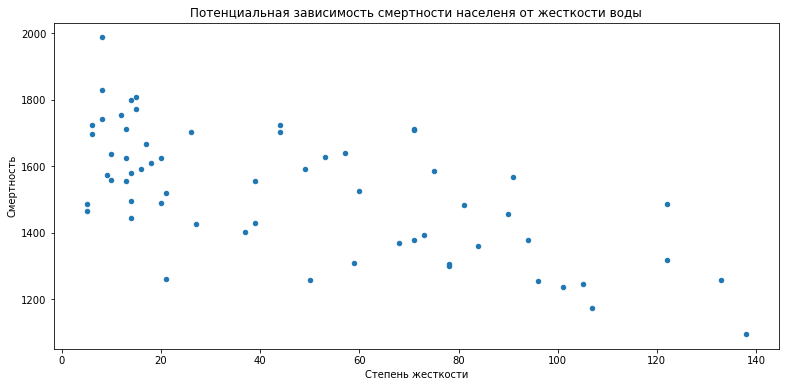

In [5]:
df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Потенциальная зависимость смертности населеня от жесткости воды')
plt.xlabel('Степень жесткости')
plt.ylabel('Смертность') 

In [6]:
# Коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [8]:
x = df[['hardness']]
y = df[['mortality']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=9)

In [10]:
model = LinearRegression()   # выбор типа регресии
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [11]:
model.coef_

array([[-2.98012447]])

In [12]:
model.intercept_

array([1671.99362328])

In [13]:
y_pred = model.predict(x_test)
y_pred

array([[1275.63706866],
       [1385.90167408],
       [1627.29175622],
       [1439.54391456],
       [1654.11287646],
       [1657.09300093],
       [1630.27188069],
       [1353.1203049 ],
       [1645.17250305],
       [1469.34515927],
       [1540.86814657],
       [1540.86814657],
       [1648.15262752],
       [1555.76876892],
       [1642.19237858],
       [1612.39113387],
       [1391.86192302],
       [1633.25200516],
       [1525.96752421]])

In [14]:
# Визуальная разница модели и факта
temp_df = x_test.copy()

temp_df['y_pred'] = y_pred
temp_df['y_test'] = y_test
temp_df['y_delta'] = temp_df['y_pred'] - temp_df['y_test']
temp_df

,hardness,y_pred,y_test,y_delta
34,133,1275.637069,1259,16.637069
14,96,1385.901674,1254,131.901674
6,15,1627.291756,1807,-179.708244
7,78,1439.543915,1299,140.543915
36,6,1654.112876,1724,-69.887124
2,5,1657.093001,1466,191.093001
43,14,1630.271881,1444,186.271881
37,107,1353.120305,1175,178.120305
23,9,1645.172503,1574,71.172503
47,68,1469.345159,1369,100.345159


In [15]:
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации

0.4774333787082189

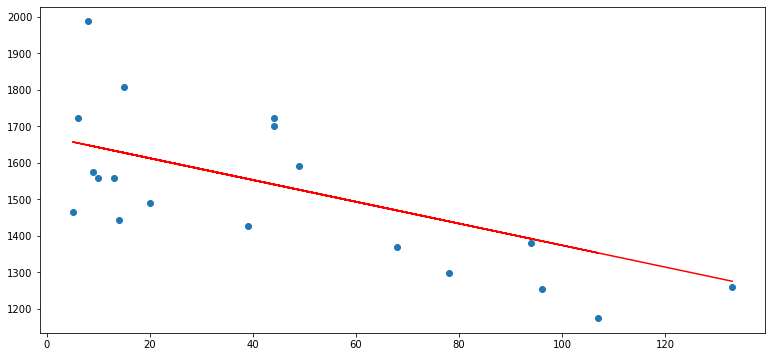

In [16]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Построение графика остатков

In [17]:
temp_df_all = x.copy()
temp_df_all['y_pred_all'] = model.predict(x)
temp_df_all['y_test'] = y
temp_df_all['y_delta'] = model.predict(x) - y
temp_df_all.head()

,hardness,y_pred_all,y_test,y_delta
0,105,1359.080554,1247,112.080554
1,17,1621.331507,1668,-46.668493
2,5,1657.093001,1466,191.093001
3,14,1630.271881,1800,-169.728119
4,18,1618.351383,1609,9.351383


<AxesSubplot:xlabel='hardness', ylabel='y_delta'>

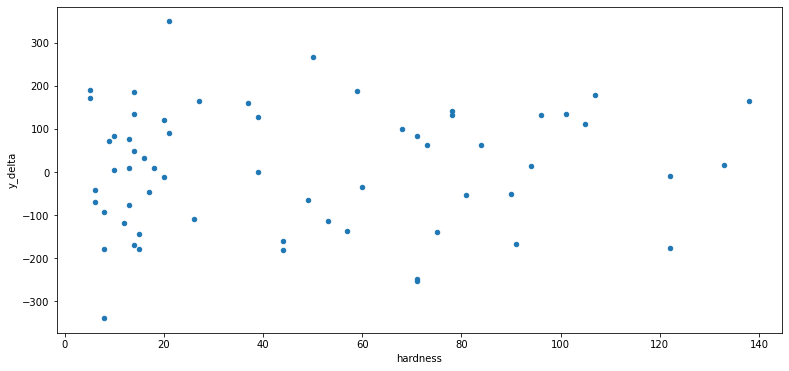

In [18]:
temp_df_all.plot(kind='scatter', x='hardness', y='y_delta')

График остатков не имеет системной составляющей, и имеет хаотичное распределение

## ВЫВОД: на основе коэф корреляции Пиросна > 0,65 можно сделать вывод, что наблюдается заметная обратная зависимость смертности от степени жесткости воды в пределах имеющихся данных

### Построение графика остатков алтернативным способом

In [19]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [21]:
x_const = sm.add_constant(x_train) # техническая особенность библиотек, надо руками добавить константу

In [22]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        10:58:15   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

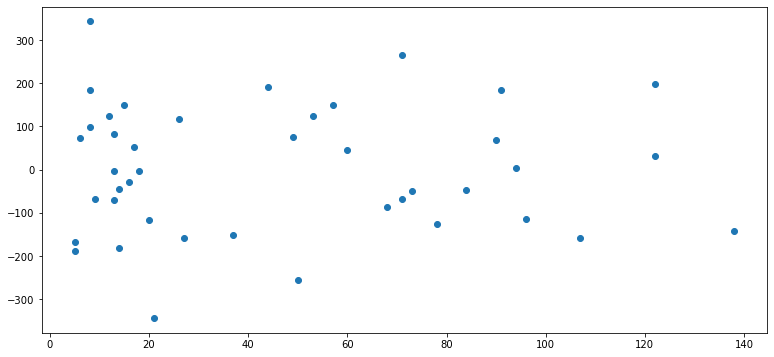

In [23]:
# график остатки
plt.scatter(x_const.iloc[:, 1], results.resid)

График остатков также не имеет системной составляющей, отличается от предыдущего, т.к. постоен не на генеральной совокупности

## Дополнительное задание

In [80]:
df_south = df[df['location'] == 'South' ]
df_north = df[df['location'] == 'North' ]

Text(0, 0.5, 'Смертность')

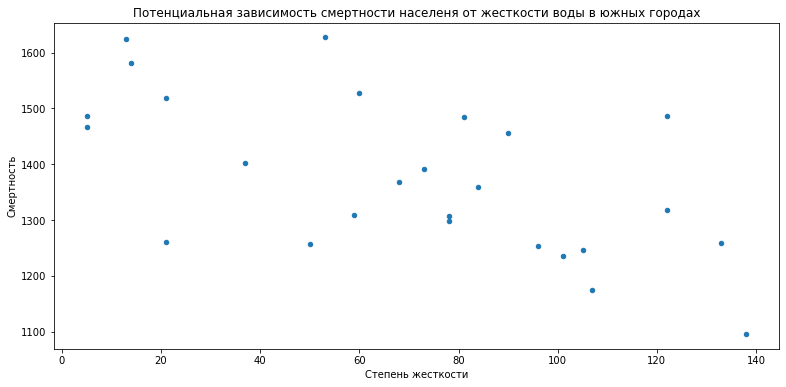

In [81]:
df_south.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Потенциальная зависимость смертности населеня от жесткости воды в южных городах')
plt.xlabel('Степень жесткости')
plt.ylabel('Смертность') 

In [82]:
# Коэффициент корреляции Пирсона
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [83]:
# Коэффициент корреляции Спирмена
df_south[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [84]:
x = df_south[['hardness']]
y = df_south[['mortality']]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=9)

In [86]:
model = LinearRegression()   # выбор типа регресии
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [87]:
y_pred = model.predict(x_test)

In [88]:
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации

-0.18352479532395605

### Модель построилась плохо, хуже чем наивная модель по среднему, скорее всего, что после разделения данных стало критически мало 

In [89]:
# Визуальная разница модели и факта
temp_df = x_test.copy()

temp_df['y_pred'] = y_pred
temp_df['y_test'] = y_test
temp_df['y_delta'] = temp_df['y_pred'] - temp_df['y_test']
temp_df

,hardness,y_pred,y_test,y_delta
12,21,1502.290875,1519,-16.709125
19,21,1502.290875,1260,242.290875
37,107,1322.512523,1175,147.512523
10,73,1393.587685,1392,1.587685
9,84,1370.592780,1359,11.592780
14,96,1345.507429,1254,91.507429
41,101,1335.055199,1236,99.055199
47,68,1404.039915,1369,35.039915


Text(0.5, 1.0, 'график остатков модели в южных городах')

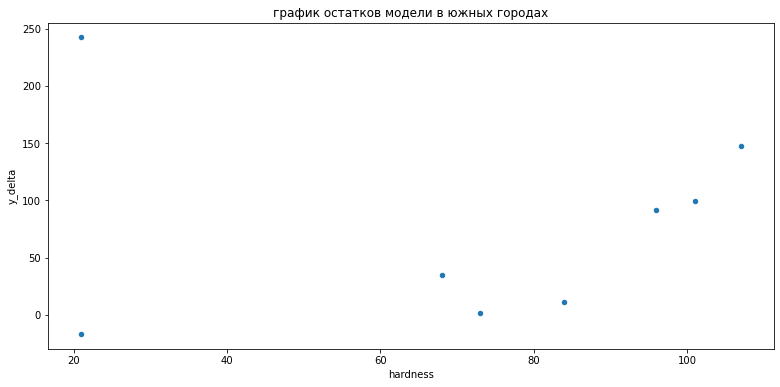

In [90]:
temp_df.plot(kind='scatter', x='hardness', y='y_delta')
plt.title('график остатков модели в южных городах')

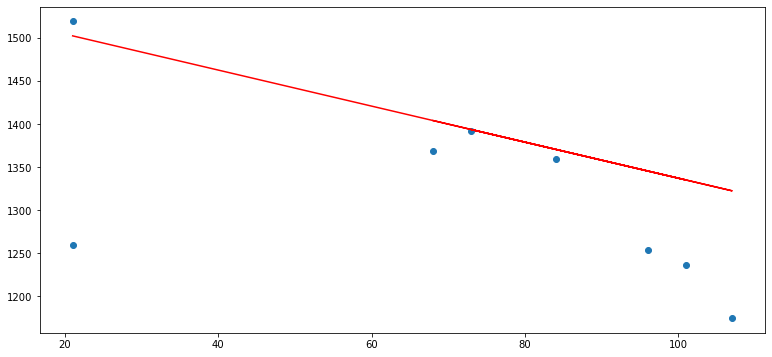

In [91]:
# Видно что модель очень сильно ошибается на тестовых данных, посмотрим теперь на линию регрессии
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [92]:
print(model.coef_, model.intercept_)

[[-2.09044595]] [1546.19023982]


In [93]:
#Уравнение линейной регресии схоже с полным набором данных

Text(0, 0.5, 'Смертность')

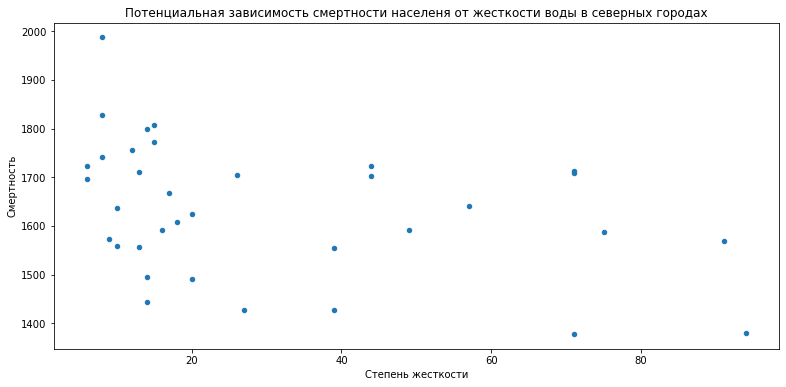

In [94]:
df_north.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Потенциальная зависимость смертности населеня от жесткости воды в северных городах')
plt.xlabel('Степень жесткости')
plt.ylabel('Смертность') 

In [95]:
# Коэффициент корреляции Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [96]:
# Коэффициент корреляции Спирмена
df_north[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


### коэф корреляции еще хуже чем в южных городах

In [97]:
x = df_north[['hardness']]
y = df_north[['mortality']]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=9)

In [99]:
model = LinearRegression()   # выбор типа регресии
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [100]:
y_pred = model.predict(x_test)

In [101]:
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации

0.06004489121657408

### Видим, что данных в северных городах стало чуть больше и модель стало уже чуть лучше наивной, что подтврждвет первичную гипотезу о том, что данных недостаточно для построение модели

In [102]:
# Визуальная разница модели и факта
temp_df = x_test.copy()

temp_df['y_pred'] = y_pred
temp_df['y_test'] = y_test
temp_df['y_delta'] = temp_df['y_pred'] - temp_df['y_test']
temp_df

,hardness,y_pred,y_test,y_delta
30,26,1645.383167,1704,-58.616833
6,15,1667.469408,1807,-139.530592
26,16,1665.461568,1591,74.461568
4,18,1661.445888,1609,52.445888
23,9,1679.516449,1574,105.516449
44,49,1599.202844,1591,8.202844
31,44,1609.242045,1702,-92.757955
50,71,1555.030361,1713,-157.969639
60,71,1555.030361,1378,177.030361
52,57,1583.140123,1640,-56.859877


Text(0.5, 1.0, 'график остатков модели в южных городах')

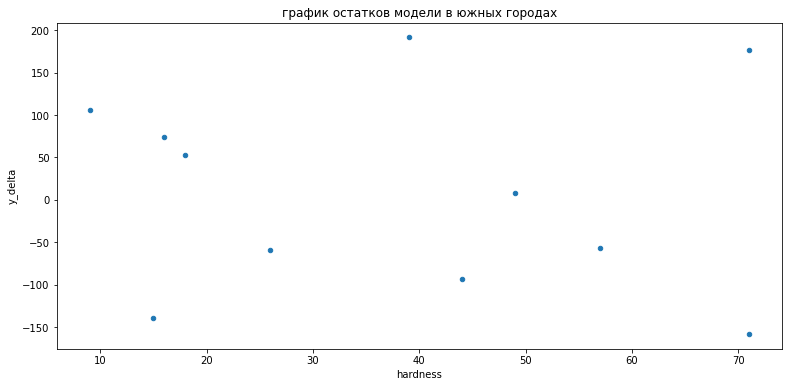

In [103]:
temp_df.plot(kind='scatter', x='hardness', y='y_delta')
plt.title('график остатков модели в южных городах')

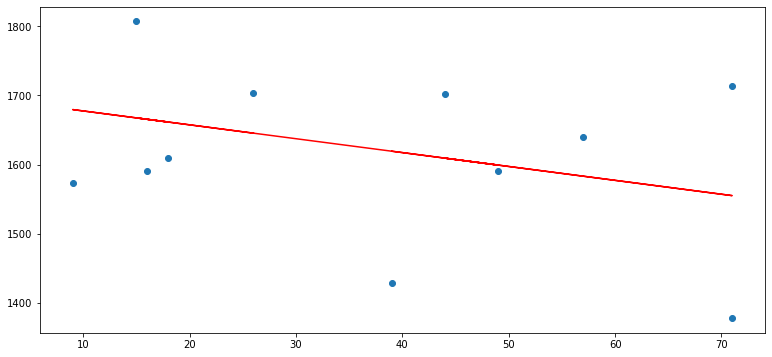

In [104]:
# Видно что модель очень сильно ошибается на тестовых данных, посмотрим теперь на линию регрессии
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [105]:
print(model.coef_, model.intercept_)

[[-2.00784012]] [1697.58700987]


In [106]:
#Уравнение линейной регресии схоже с полным набором данных

## Несмотря на то, что уравнение регресии по районам городов схоже с полным набором данных, доверять таким моделям не стоит